In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Data Preparation

In [2]:
origin = pd.read_csv("../dataset/softwares.csv")
origin

,name,release_date,product_of_the_day_date,product_ranking,upvotes,category_tags,hunter,makers,last_updated
0,AR Fidget Spinner,2017-09-19 00:00:00.000,NaN,NaN,134,"['IPAD', 'IPHONE', 'ARKIT', 'AUGMENTED REALITY']",shanev,"['shanev', 'tettoffensive']",2022-01-11 01:34:10.874
1,e-botfinder,2016-05-29 00:00:00.000,NaN,NaN,183,"['BOTS', 'ARTIFICIAL INTELLIGENCE', 'TECH', 'S...",fabian_beringer,['fabian_beringer'],2022-01-12 19:28:49.769
2,BioGlo,2018-01-06 00:00:00.000,NaN,NaN,196,"['TECH', 'EDUCATION', 'CROWDFUNDING', 'HOME', ...",keegan_cooke,['keegan_cooke'],2022-01-11 09:00:59.413
3,Onsites,2018-02-09 00:00:00.000,2018-02-09,4.0,315,"['PRODUCTIVITY', 'USER EXPERIENCE', 'TECH', 'E...",_shahedk,['jmtame'],2022-01-12 11:04:49.060
4,Easylistr iOS - Twitter lists made easy,2016-06-01 00:00:00.000,NaN,NaN,104,"['TWITTER', 'PRODUCTIVITY', 'IPHONE', 'TECH']",igorbogdanovski,[],2022-01-12 14:52:25.118
...,...,...,...,...,...,...,...,...,...
76817,Tone Script,2021-03-19 00:00:00.000,NaN,NaN,35,"['DESIGN TOOLS', 'GITHUB', 'WRITING TOOLS', 'T...",lance_pollard,['lance_pollard'],2022-01-14 15:02:19.010
76818,UI & UX Micro Tips: Ultimate Collection,2021-05-30 00:00:00.000,2021-05-30,5.0,269,"['USER EXPERIENCE', 'DESIGN TOOLS', 'DESIGN BO...",mrcndrw,['mrcndrw'],2022-01-14 15:02:20.097
76819,ListKit,2021-09-08 00:00:00.000,NaN,NaN,120,"['GROWTH HACKING', 'MARKETING', 'GROWTH HACKS'...",alexgrayb2b,"['alexgrayb2b', 'andre_b_haykal', 'bonnchri23']",2022-01-14 15:02:21.797
76820,IdeaOnce,2021-09-28 00:00:00.000,NaN,NaN,588,"['DESIGN TOOLS', 'PRODUCTIVITY', 'MARKETING', ...",teamideaonce,"['teamideaonce', 'rayideaonce']",2022-01-14 15:02:21.905


In [3]:
needed = origin[["name", "release_date", "upvotes", "category_tags"]].copy()
needed["release_timestamp"] = needed["release_date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp())
needed

,name,release_date,upvotes,category_tags,release_timestamp
0,AR Fidget Spinner,2017-09-19 00:00:00.000,134,"['IPAD', 'IPHONE', 'ARKIT', 'AUGMENTED REALITY']",1.505750e+09
1,e-botfinder,2016-05-29 00:00:00.000,183,"['BOTS', 'ARTIFICIAL INTELLIGENCE', 'TECH', 'S...",1.464451e+09
2,BioGlo,2018-01-06 00:00:00.000,196,"['TECH', 'EDUCATION', 'CROWDFUNDING', 'HOME', ...",1.515168e+09
3,Onsites,2018-02-09 00:00:00.000,315,"['PRODUCTIVITY', 'USER EXPERIENCE', 'TECH', 'E...",1.518106e+09
4,Easylistr iOS - Twitter lists made easy,2016-06-01 00:00:00.000,104,"['TWITTER', 'PRODUCTIVITY', 'IPHONE', 'TECH']",1.464710e+09
...,...,...,...,...,...
76817,Tone Script,2021-03-19 00:00:00.000,35,"['DESIGN TOOLS', 'GITHUB', 'WRITING TOOLS', 'T...",1.616083e+09
76818,UI & UX Micro Tips: Ultimate Collection,2021-05-30 00:00:00.000,269,"['USER EXPERIENCE', 'DESIGN TOOLS', 'DESIGN BO...",1.622304e+09
76819,ListKit,2021-09-08 00:00:00.000,120,"['GROWTH HACKING', 'MARKETING', 'GROWTH HACKS'...",1.631030e+09
76820,IdeaOnce,2021-09-28 00:00:00.000,588,"['DESIGN TOOLS', 'PRODUCTIVITY', 'MARKETING', ...",1.632758e+09


In [4]:
tags = ["DESIGN TOOLS", "PHOTOGRAPHY", "PRODUCTIVITY", "WEB APP"]

In [5]:
has_tag_tables, top_tables = [], []
for tag in tags:
    has_tag = needed["category_tags"].apply(lambda x: tag in eval(x))
    has_tag_table = needed[has_tag].copy()[["name", "upvotes", "release_timestamp"]].sort_values("upvotes")
    has_tag_table["tag"] = tag
    top_tables.append(has_tag_table[-5:])
    has_tag_table["attribute"] = "others"
    has_tag_table.iloc[-5:, -1] = "Tops"
    has_tag_tables.append(has_tag_table)

In [6]:
has_tag_tables[3].iloc[-10:]

,name,upvotes,release_timestamp,tag,attribute
10221,Marketing Stack,6152,1.437408e+09,WEB APP,others
45836,AutoDraw,6521,1.491840e+09,WEB APP,others
35867,Unsplash 5.0,6991,1.485792e+09,WEB APP,others
11434,Good Email Copy,7457,1.459786e+09,WEB APP,others
26637,Hunter,7584,1.430150e+09,WEB APP,others
31790,Coolors,9012,1.413994e+09,WEB APP,Tops
39216,Hotjar,10022,1.438013e+09,WEB APP,Tops
25389,Pexels 2.0,10206,1.432310e+09,WEB APP,Tops
44613,Startup Pitch Decks,11060,1.473091e+09,WEB APP,Tops
2360,Startup Stash,21798,1.424794e+09,WEB APP,Tops


In [7]:
top_tables[0]

,name,upvotes,release_timestamp,tag
70987,Ludus Beta,6071,1.494346e+09,DESIGN TOOLS
35867,Unsplash 5.0,6991,1.485792e+09,DESIGN TOOLS
31790,Coolors,9012,1.413994e+09,DESIGN TOOLS
25389,Pexels 2.0,10206,1.432310e+09,DESIGN TOOLS
2850,remove.bg,16888,1.544976e+09,DESIGN TOOLS


In [8]:
data_to_show = pd.concat(has_tag_tables)
data_to_show

,name,upvotes,release_timestamp,tag,attribute
33344,سجاده فرش 500 شانه,0,1.582646e+09,DESIGN TOOLS,others
66913,Ability UI KIT,21,1.615392e+09,DESIGN TOOLS,others
68869,Starter Plan by Optimal Workshop,21,1.623773e+09,DESIGN TOOLS,others
57415,Weaver,21,1.595779e+09,DESIGN TOOLS,others
17761,The Design of Business | The Business of Desig...,21,1.476720e+09,DESIGN TOOLS,others
...,...,...,...,...,...
31790,Coolors,9012,1.413994e+09,WEB APP,Tops
39216,Hotjar,10022,1.438013e+09,WEB APP,Tops
25389,Pexels 2.0,10206,1.432310e+09,WEB APP,Tops
44613,Startup Pitch Decks,11060,1.473091e+09,WEB APP,Tops


# 1. Plotting

In [9]:
years = sorted(needed["release_date"].apply(lambda x: x.split(' ')[0].split('-')[0]).value_counts().index)
years

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [10]:
year_stamps = list(map(lambda x: datetime(int(x), 1, 1).timestamp(), years))
year_stamps

[1388505600.0,
 1420041600.0,
 1451577600.0,
 1483200000.0,
 1514736000.0,
 1546272000.0,
 1577808000.0,
 1609430400.0]

In [11]:
tag_df_map = dict(zip(tags, top_tables))

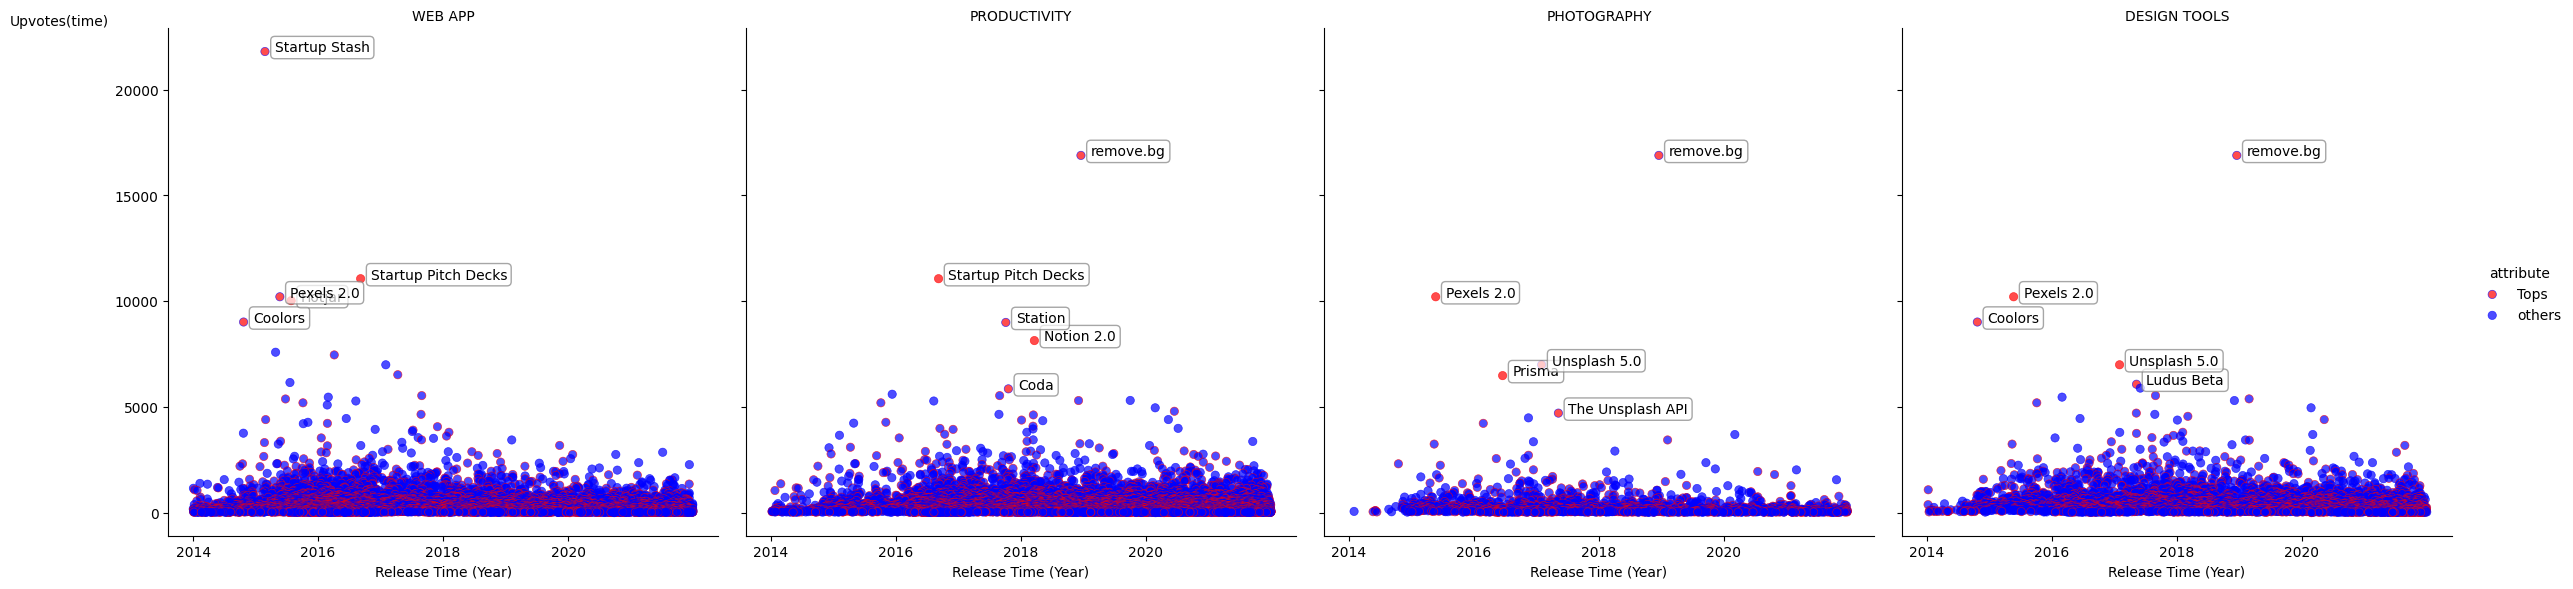

In [12]:
g = sns.FacetGrid(data_to_show[::-1], col="tag", hue="attribute", height=6, palette=["red", "blue"])
fig = plt.gcf()
axes_list = fig.axes

g.map(sns.scatterplot, "release_timestamp", "upvotes", alpha=0.7, edgecolor=["blue", "red"])
g.set_xlabels("Release Time (Year)")
g.set_titles("{col_name}")
# g.set_xticklabels(years, year_stamps)
axes_list[0].set_ylabel("Upvotes(time)", rotation='horizontal', ha='right', y=1, va='bottom')

for ax in axes_list:
    ax.set_xticks(year_stamps[::2], years[::2])
    tag = ax.get_title()
    df = tag_df_map[tag]
    for _, row in df.iterrows():
        ax.text(row["release_timestamp"] + 5000000, row["upvotes"], row["name"], 
                bbox=dict(boxstyle="round", 
                          ec="gray",
                          fc="white",
                          alpha=0.7
                         ))

g.add_legend()